In [40]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import os

In [51]:
def convert_to_alphaXY(theta,phi):
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY)

def calculate_impact_to_object(dist_to_object,PosXX,PosYY,Theta,Phi):
    AngXX,AngYY = convert_to_alphaXY(Theta,Phi)
    #calculate intermediate point
    a = PosXX - dist_to_object * np.tan(AngXX)
    b = PosYY - dist_to_object * np.tan(AngYY)
    #shape condition, in this case, a circle centered in (10,10) with radius 5.
    
    if 100 > ((a - 5)**2 + (b - 10)**2):
        impact = True
    else:
        impact = False
    '''
    if 5 < a < 15 and 5 < b < 15:
        impact = True
    else:
        impact = False
    '''
    #return the result
    return impact


In [52]:
number_of_files = int(len(os.listdir("Pavia0")[1:])/3)
finalposition = []
finaltheta = []
finalphi = []

for elem in range(number_of_files):
    countpos,countneg = 0,0
    titleTheta = "Pavia0/Testrun-of-full-sim-AngleTheta-index"+str(elem)+".txt"
    with open(titleTheta, 'r') as file:
        AnTheta = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    
    titlePhi = "Pavia0/Testrun-of-full-sim-AnglePhi-index"+str(elem)+".txt"
    with open(titlePhi, 'r') as file:
        AnPhi = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    
    titlePos =  "Pavia0/Testrun-of-full-sim-positionXY-index"+str(elem)+".txt"
    with open(titlePos, 'r') as file:
        Position = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    
    for i in range(len(AnPhi)):
        impact = calculate_impact_to_object(10,Position[i,0],Position[i,1],AnTheta[i],AnPhi[i])
        if impact == False:
            finalposition.append(Position[i,:])
            countpos +=1
        else: 
            countneg +=1
    print("Iteration "+str(elem)+" Number of points: "+str(len(finalposition))+" Positive: "+str(countpos)+" Negative "+str(countneg))

Iteration 0 Number of points: 860504 Positive: 860504 Negative 139496
Iteration 1 Number of points: 1720853 Positive: 860349 Negative 139651
Iteration 2 Number of points: 2580456 Positive: 859603 Negative 140397
Iteration 3 Number of points: 3440558 Positive: 860102 Negative 139898
Iteration 4 Number of points: 4301243 Positive: 860685 Negative 139315
Iteration 5 Number of points: 5160965 Positive: 859722 Negative 140278
Iteration 6 Number of points: 6020596 Positive: 859631 Negative 140369
Iteration 7 Number of points: 6880811 Positive: 860215 Negative 139785
Iteration 8 Number of points: 7740833 Positive: 860022 Negative 139978
Iteration 9 Number of points: 8600591 Positive: 859758 Negative 140242
Iteration 10 Number of points: 9460278 Positive: 859687 Negative 140313
Iteration 11 Number of points: 10320433 Positive: 860155 Negative 139845
Iteration 12 Number of points: 11180819 Positive: 860386 Negative 139614
Iteration 13 Number of points: 12040905 Positive: 860086 Negative 139914


In [53]:
PosXX_after = np.zeros(len(finalposition))
PosYY_after = np.zeros(len(finalposition))

for i in range(len(finalposition)):
    PosXX_after[i] = finalposition[i][0]
    PosYY_after[i] = finalposition[i][1]

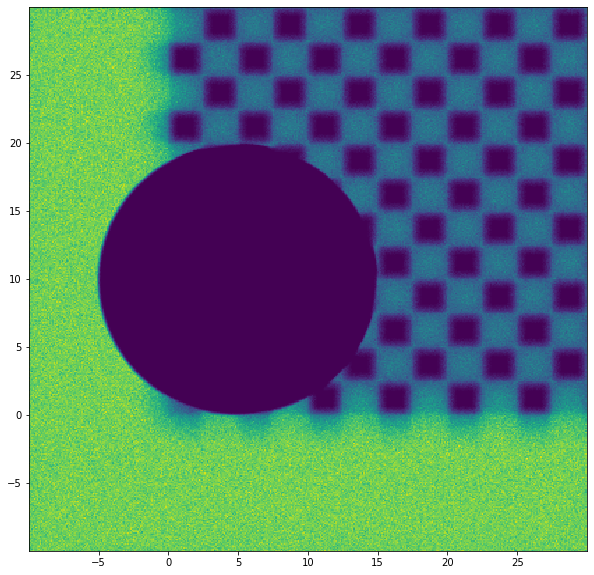

In [61]:
plt.figure(figsize=(10,10))
hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400)
plt.show()
plt.close()

Inner
[  0.   0.   0.   0.   0.  30.  82. 113.  91. 107.  87.  98. 104. 127.
  94.  94. 108. 109. 113. 131.]
Outer
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.  11.  34.  72.
 136. 202. 217. 277. 269. 277.]


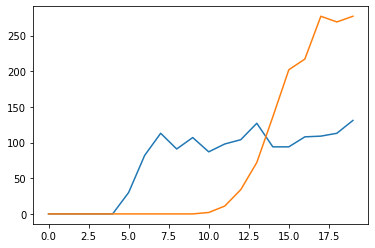

In [66]:
#plt.plot(hist[125])
plt.plot(hist[200][280:300])
plt.plot(hist[60][230:250])
print("Inner")
print(hist[200][280:300])
print("Outer")
print(hist[60][230:250])